# Generative System Induction with 2D support

## Preliminaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyp
import matplotlib as mpl
import os
import codecs
import sys

In [2]:
%matplotlib inline

In [3]:
import rule30

In [88]:
rows = 60

aut = rule30.automaton.Automaton(rows, rule=30)

In [89]:
hist_arr = aut.nparray()

In [104]:
hist_arr.shape

(60, 119)

In [91]:
hist_arr*1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1]])

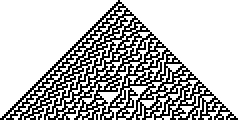

In [110]:
img = aut.image(2)
img

In [111]:
img.save('rule30img_60rows_horz.png', format='png')

In [93]:
import PIL

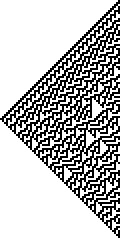

In [112]:
imgtranspose = img.transpose(PIL.Image.TRANSPOSE)
imgtranspose

In [113]:
imgtranspose.save('rule30img_60rows.png', format='png')

In the original specification of a generative system, Klir mandates that a mask cover all variables of a data system, spanning the 0th dimention of the data matrix.  In this notebook, I implement a "2D" mask that does *not* span all variables this way.

The Generative_system class' get_generation_probabilities method takes a mask that occupies a portion (or all) of the data matrix' 0th dimension, holding variables.  Now, we're moving a mask in two dimensions over the CA data matrix: time (dimension 1) and x (the variable dimension 0).

Given a maximum x length of 3 variables and 2 steps in time (3x2 rectangle), I generate one mask, then translate it across the top of the CA matrix, move down one variable row in x, scan across, etc.  The sampling variables produced for each step in the scan provide the ingredients for this mask's behavior system, before the next mask is generated and treated the same way.  The get_generation_probabilities method performs this progressive scanning motion automatically when the mask variable dimension size is less than the data matrix's variable dimension size.

In [69]:
# Make sure the root directory of this repository is in the search path for Python modules.

import GSPS.generative_system.generative_system as GSystem

In [120]:
# Make mask generator.

maxdepth = 2
vnum = 3

MM = GSystem.M_matrix(vnum, maxdepth)

data = hist_arr.T*1

mgen = MM.mask_generator(increasing=True)

In [121]:
pot_gsystems = []
for m in mgen:
    
    GSys = GSystem.Generative_system(*m)
    GSys.compute_behavior_system(data)
    pot_gsystems.append(GSys)

In [122]:
admissible = GSystem.find_admissible_behavior_systems(pot_gsystems)

In [123]:
[admgs.complexity for admgs in admissible]

[6, 5, 4]

In [124]:
[admgs.uncertainty for admgs in admissible]

[1.0230969438030528, 1.110577026577654, 1.4683999376366847]

In [126]:
for admgs in admissible:
    print('---')
    print(ta[admgs.generating_maskinds])
    print(ta[admgs.generated_maskinds])

---
[0 2 4]
[1 3 5]
---
[2 4]
[0 3 5]
---
[2]
[0 3 4]


In [99]:
ta

array([[0, 1],
       [2, 3],
       [4, 5]])

So the generating mask isn't capable of representing the CA rule at all.  If it was, we would see an uncertainty of 0.

## Using altered generating mask partitioning

Here I violate the "generated leading edge" rule, implemented with the `mask_generator_onlymaxbackdropgenerating` method.

In [127]:
# Make mask generator.

maxdepth = 2
vnum = 3

MM = GSystem.M_matrix(vnum, maxdepth)

data = hist_arr.T*1

mgenalt = MM.mask_generator_onlymaxbackdropgenerating(increasing=True)

In [128]:
pot_gsystems = []
for mi, m in enumerate(mgenalt):
    
    GSys = GSystem.Generative_system(*m)
    GSys.compute_behavior_system(data)
    pot_gsystems.append(GSys)

In [129]:
admissible = GSystem.find_admissible_behavior_systems(pot_gsystems)

In [130]:
[admgs.uncertainty for admgs in admissible]

[0.0, 0.41247526237856025]

In [131]:
[admgs.complexity for admgs in admissible]

[4, 3]

In [133]:
for admgs in admissible:
    print('---')
    print(ta[admgs.generating_maskinds])
    print(ta[admgs.generated_maskinds])

---
[0 2 4]
[3]
---
[0 4]
[3]


In [134]:
ta

array([[0, 1],
       [2, 3],
       [4, 5]])